<a href="https://colab.research.google.com/github/brothersanta/UT-AI/blob/main/LLM_Classification_Support_Ticket_Triage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Business Context**

In today's dynamic business landscape, organizations are increasingly recognizing the pivotal role customer feedback plays in shaping the trajectory of their products and services. The ability to **swiftly and effectively respond to customer input** not only fosters enhanced customer experiences but also serves as a catalyst for growth, prolonged customer engagement, and the nurturing of lifetime value relationships.

As a dedicated Product Manager or Product Analyst, staying attuned to the voice of your customers is not just a best practice; it's a strategic imperative.

While your organization may be inundated with a wealth of customer-generated feedback and support tickets, your role entails much more than just processing these inputs. To make your efforts in managing customer experience and expectations truly impactful, you need a structured approach – a method that allows you to discern the most pressing issues, set priorities, and allocate resources judiciously.

One of the most effective strategies at your disposal as an organization is to harness the power of automated Support Ticket Categorization - **done in the modern day using Large Language Models and Generative AI.**


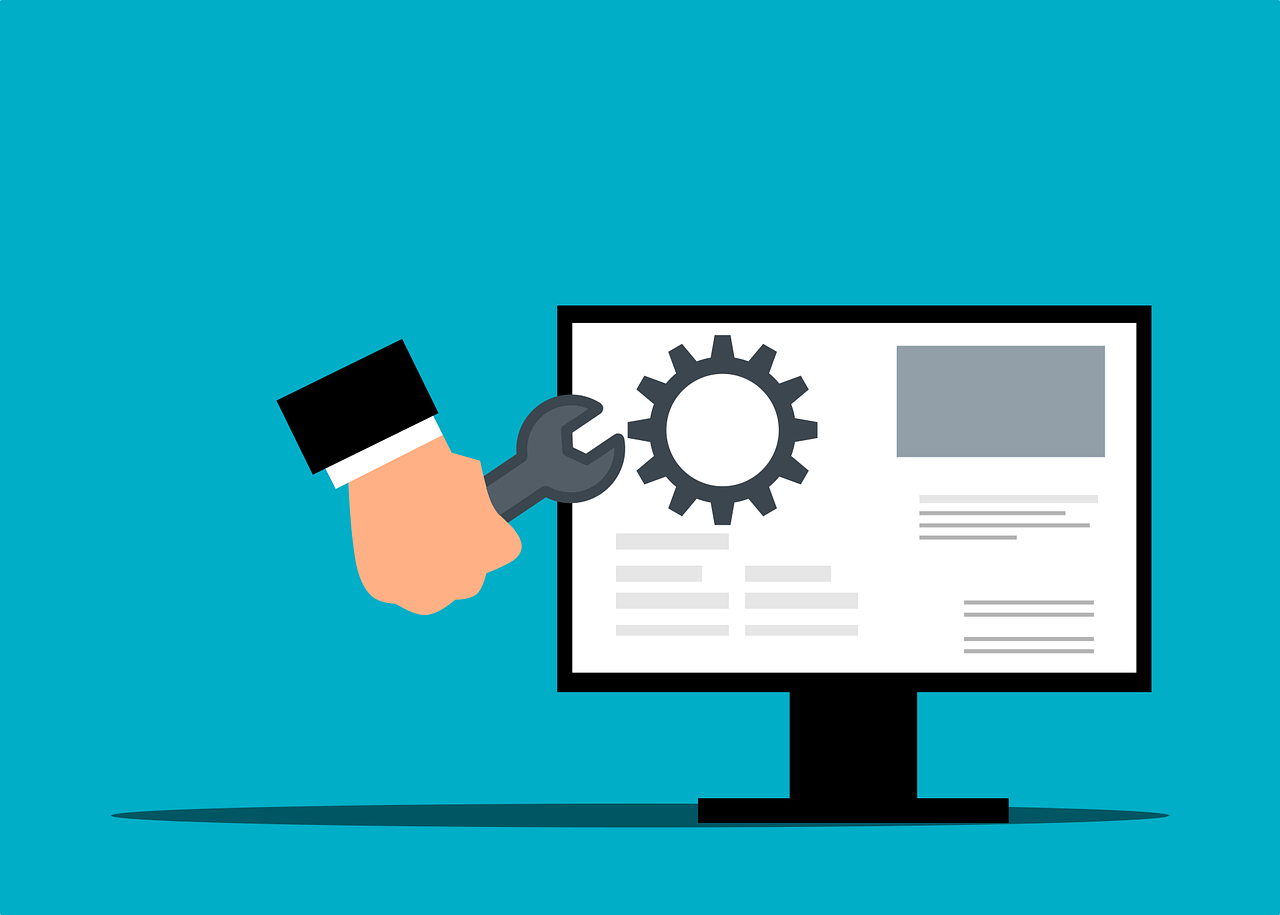

### **Objective**

Develop a Generative AI application using a Large Language Model to **automate the classification and processing of support tickets.** The application will aim to predict ticket categories, assign priority, suggest estimated resolution times, generate responses based on sentiment analysis, and store the results in a structured DataFrame.


### **Step 1: Install Necessary Libraries and Dependencies**

In [ ]:
# Library bug fix per support thread
!pip uninstall -y cupy-cuda11x
!pip uninstall -y tensorflow-probability
!pip install --no-cache-dir cupy-cuda12x
!pip install --no-cache-dir tensorflow-probability
!pip install kaleido python-multipart openai tiktoken cohere uvicorn fastapi
!pip install huggingface-hub>=0.17.1
!pip install hf_transfer

Found existing installation: tensorflow-probability 0.22.0
Uninstalling tensorflow-probability-0.22.0:
  Successfully uninstalled tensorflow-probability-0.22.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.1/225.1 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 87.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python --force-reinstall --upgrade --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 39.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 169.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 235.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 260.6 MB/s eta 0:00:00


In [ ]:
# Install the hugging face hub
!pip install huggingface_hub -q

**Step 2: Ensure that the code is correctly formatted and ready for execution.**

In [ ]:
# import the 'hf_hub_download' function from the 'huggingface_hub' library
from huggingface_hub import hf_hub_download

# import the 'Llama' class from the 'llama_cpp' library
from llama_cpp import Llama

In [ ]:
# defining the model name or path as a string (source: hugging face website)
model_basenameme_or_path = "TheBloke/Llama-2-13B-chat-GGUF"

# defining the model basename as a string, indicating it's in the gguf format
model_basename = "llama-2-13b-chat.Q5_K_M.gguf"

In [ ]:
# downloading the model from the Hugging Face Hub using the 'hf_hub_download' function by specifying the 'repo_id' and 'filename'
model_path = hf_hub_download(
    repo_id = model_basenameme_or_path,
    filename = model_basename
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.Q5_K_M.gguf:   0%|          | 0.00/9.23G [00:00<?, ?B/s]

In [ ]:
# create an instance of the 'Llama' class with specified parameters

lcpp_llm = Llama(
        model_path=model_path,
        n_threads=2,
        n_batch=512,
        n_gpu_layers=43,
        n_ctx=4096,
    )

AVX = 1 | AVX_VNNI = 0 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 
Model metadata: {'tokenizer.ggml.unknown_token_id': '0', 'tokenizer.ggml.eos_token_id': '2', 'general.architecture': 'llama', 'llama.context_length': '4096', 'general.name': 'LLaMA v2', 'llama.embedding_length': '5120', 'llama.feed_forward_length': '13824', 'llama.attention.layer_norm_rms_epsilon': '0.000010', 'llama.rope.dimension_count': '128', 'llama.attention.head_count': '40', 'tokenizer.ggml.bos_token_id': '1', 'llama.block_count': '40', 'llama.attention.head_count_kv': '40', 'general.quantization_version': '2', 'tokenizer.ggml.model': 'llama', 'general.file_type': '17'}


### **Step 3: Define the System Message**

Write a Python function called **generate_llama_response** that takes a single parameter, support_ticket_text, which represents the user's support ticket text. Inside the function, perform the following tasks:

Define a system message as a string and assign it to the variable system_message.

- **Combine the support_ticket_text and system_message to create a prompt string.**

*Generate a response from the LLaMA model using the lcpp_llm instance with the following parameters:*

- prompt should be the combined prompt string.
- max_tokens should be set to 256.
- temperature should be set to 0.
- top_p should be set to 0.95.
- repeat_penalty should be set to 1.2.
- top_k should be set to 50.
- stop should be set as a list containing 'INST'.
- echo should be set to False.
Extract and return the response text from the generated response.

Provide a value for the system_message variable before using it in the function.



*The information and guidelines that the system message should contain.*



- **Introduction (System Role):** Begin with an introductory statement that establishes the role of the system message. In this case, it's acting as a guide for a technical assistant.

- **Ticket Categorization:** Explain the primary task of the technical assistant, which is to classify the support ticket into specific categories. In this example, the categories are:
    - Technical Issues
    - Hardware Issues
    - Data Recovery

- **Response Options:** Clearly state that the assistant should only respond with one of the predefined categories, emphasizing that other responses are not acceptable.

- **Sub-Tasks:** Outline the secondary tasks that the technical assistant should perform once the category is identified. These sub-tasks include:
  - **Creating Tags:** Instruct the assistant to create tags that will help further classify the ticket.
  - **Assigning Priority:** Specify that the assistant should assign a priority level (e.g., "High" or "Normal") based on their understanding of the text.
  - **Suggesting ETA:** Guide the assistant to provide an estimated time for
resolving the issue mentioned in the ticket.

- **General Instructions:** Offer general instructions that should be followed throughout the ticket processing, such as:

  - **Categorization:** Reiterate that the assistant should categorize the ticket only into the predefined categories.
  - **Reading Carefully:** Stress the importance of reading the support ticket text thoroughly and considering the overall sentiment before assigning priority.
  - **Output Format:** Clearly specify the desired output format for the responses generated by the assistant. In this case, the output should be in JSON format.

**The output of the model should be in JSON format**

In [ ]:
def generate_llama_response(support_ticket_text):

    # System message
    system_message = """
        [INST]<<SYS>>
        You are an AI analyzing a customer support ticket. Classify the provided support ticket into one of the following three categories:
        - Technical Issues
        - Hardware Issues
        - Data Recovery

        Do not respond with any other categories.
        Start your message with the category

        Next, identify tags for issue in the ticket.

    Return the output in specified JSON format:
{
"Category":Category,
"Tags":[Tags to classify the ticket],
"Priority": "High/Medium/Low depending on priority of the ticket,
"ETA": "Time expected to resolve ticket"
}

Only return the JSON, do NOT return any other text or information.

        <</SYS>>[/INST]
    """

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{support_ticket_text}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=256,
        temperature=0,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False
    )

    # Extract and return the response text
    response_text = response["choices"][0]["text"]
    return response_text

### **Step 4: Loading the Dataset**

In [ ]:
# Import the pandas library and alias it as 'pd'
import pandas as pd


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the CSV file into a DataFrame and store it in the 'data' variable
data = pd.read_csv('/content/drive/MyDrive/Support_ticket_text_data_mid_term.csv')

### **Data Overview**

In [ ]:
# Check the first 5 rows of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   support_tick_id      21 non-null     object
 1   support_ticket_text  21 non-null     object
dtypes: object(2)
memory usage: 464.0+ bytes


In [ ]:
# Check the shape of the data
data.shape

(21, 2)

In [ ]:
# Check for missing values in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   support_tick_id      21 non-null     object
 1   support_ticket_text  21 non-null     object
dtypes: object(2)
memory usage: 464.0+ bytes


### **Step 5: Create a new column in the DataFrame called 'llama_response' and populate it with responses generated by applying the 'generate_llama_response' function to each 'support_ticket_text' in the DataFrame**

In [ ]:
# create a new column llama_response'
# by applying the function to each element in the 'support_ticket_text' column of the DataFrame 'data'
data['llama_response'] = data['support_ticket_text'].apply(lambda x: generate_llama_response(x))

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [ ]:
# Check the first five rows of the data to confirm whether the new column has been added
data.head()


,support_tick_id,support_ticket_text,llama_response
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""Category"": ""Technical Issues"",\n ..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n ""Category"": ""Hardware Issues"",\n ..."
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""Category"": ""Data Recovery"",\n ..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""Category"": ""Technical Issues"",\n ..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n ""Category"": ""Hardware Issues"",\n ..."


### **Step 6: Prepare the dataset in the desired format.**

In [ ]:
import json

In [ ]:
# Function to parse JSON data and extract key-value pairs
def extract_json_data(json_str):
    try:
        data_dict = json.loads(json_str)
        return data_dict
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

In [ ]:
# Apply the function to the 'llama_response' column
data['llama_response_parsed'] = data['llama_response'].apply(extract_json_data)
data.head()

,support_tick_id,support_ticket_text,llama_response,llama_response_parsed
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""Category"": ""Technical Issues"",\n ...","{'Category': 'Technical Issues', 'Tags': ['Int..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n ""Category"": ""Hardware Issues"",\n ...","{'Category': 'Hardware Issues', 'Tags': ['Lapt..."
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""Category"": ""Data Recovery"",\n ...","{'Category': 'Data Recovery', 'Tags': ['Accide..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""Category"": ""Technical Issues"",\n ...","{'Category': 'Technical Issues', 'Tags': ['Wea..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n ""Category"": ""Hardware Issues"",\n ...","{'Category': 'Hardware Issues', 'Tags': ['Batt..."


In [ ]:
# creating a new dataframe from the parsed llama response
llama_response_parsed_df = pd.json_normalize(data['llama_response_parsed'])

In [ ]:
llama_response_parsed_df.head()

,Category,Tags,Priority,ETA
0,Technical Issues,"[Internet Connection, Disconnections, Efficiency]",High,24 hours
1,Hardware Issues,"[Laptop startup issues, Urgent assistance requ...",High,24 hours
2,Data Recovery,"[Accidental Deletion, Essential Documents]",High,24 hours
3,Technical Issues,[Weak Wi-Fi signal],Medium,24 hours
4,Hardware Issues,[Battery Drain],High,2-3 business days


In [ ]:
# concatenate the original data with the dataframe containing the parsed model output
data_with_parsed_model_output = pd.concat([data,llama_response_parsed_df], axis=1)
data_with_parsed_model_output.head()

,support_tick_id,support_ticket_text,llama_response,llama_response_parsed,Category,Tags,Priority,ETA
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""Category"": ""Technical Issues"",\n ...","{'Category': 'Technical Issues', 'Tags': ['Int...",Technical Issues,"[Internet Connection, Disconnections, Efficiency]",High,24 hours
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n ""Category"": ""Hardware Issues"",\n ...","{'Category': 'Hardware Issues', 'Tags': ['Lapt...",Hardware Issues,"[Laptop startup issues, Urgent assistance requ...",High,24 hours
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""Category"": ""Data Recovery"",\n ...","{'Category': 'Data Recovery', 'Tags': ['Accide...",Data Recovery,"[Accidental Deletion, Essential Documents]",High,24 hours
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""Category"": ""Technical Issues"",\n ...","{'Category': 'Technical Issues', 'Tags': ['Wea...",Technical Issues,[Weak Wi-Fi signal],Medium,24 hours
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n ""Category"": ""Hardware Issues"",\n ...","{'Category': 'Hardware Issues', 'Tags': ['Batt...",Hardware Issues,[Battery Drain],High,2-3 business days


In [ ]:
# drop the columns containing the raw model response
final_data = data_with_parsed_model_output.drop('llama_response', axis=1)
final_data.head()

,support_tick_id,support_ticket_text,llama_response_parsed,Category,Tags,Priority,ETA
0,ST2023-006,My internet connection has significantly slowe...,"{'Category': 'Technical Issues', 'Tags': ['Int...",Technical Issues,"[Internet Connection, Disconnections, Efficiency]",High,24 hours
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{'Category': 'Hardware Issues', 'Tags': ['Lapt...",Hardware Issues,"[Laptop startup issues, Urgent assistance requ...",High,24 hours
2,ST2023-008,I've accidentally deleted essential work docum...,"{'Category': 'Data Recovery', 'Tags': ['Accide...",Data Recovery,"[Accidental Deletion, Essential Documents]",High,24 hours
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{'Category': 'Technical Issues', 'Tags': ['Wea...",Technical Issues,[Weak Wi-Fi signal],Medium,24 hours
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{'Category': 'Hardware Issues', 'Tags': ['Batt...",Hardware Issues,[Battery Drain],High,2-3 business days


In [ ]:
# drop the columns containing the raw model response
final_data = data_with_parsed_model_output.drop(['llama_response','llama_response_parsed'], axis=1)
final_data.head()

,support_tick_id,support_ticket_text,Category,Tags,Priority,ETA
0,ST2023-006,My internet connection has significantly slowe...,Technical Issues,"[Internet Connection, Disconnections, Efficiency]",High,24 hours
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware Issues,"[Laptop startup issues, Urgent assistance requ...",High,24 hours
2,ST2023-008,I've accidentally deleted essential work docum...,Data Recovery,"[Accidental Deletion, Essential Documents]",High,24 hours
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Technical Issues,[Weak Wi-Fi signal],Medium,24 hours
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware Issues,[Battery Drain],High,2-3 business days


### **Step 7: Share observations and insights from this exercise, and recommendations for a business looking to adopt a solution such as this.**

In [ ]:
### LLMS are a powerful and incredible tool. With very little guidance:
## The LLM was able to pull relevant details to create ticket categorization
## The LLM was able to identify relevant details to create tags
## The LLM was able to prioritize the list of support tickets
## The LLM was able to provide an ETA for resolution


-


In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")



---

